# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult_with_headers.csv to adult_with_headers (1).csv


In [4]:
data = pd.read_csv(list(uploaded.keys())[0])

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isna().sum()[data.isna().sum()>0]

,0


In [7]:
data.duplicated().sum()

np.int64(24)

In [8]:
data.head(7)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
one_hot_cols = data.nunique()[data.nunique()<=4]

In [11]:
le_cols = data.nunique()[data.nunique().between(5, 45)]

In [12]:
df = data.copy()

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.reset_index(inplace = True, drop = True)

# EDA

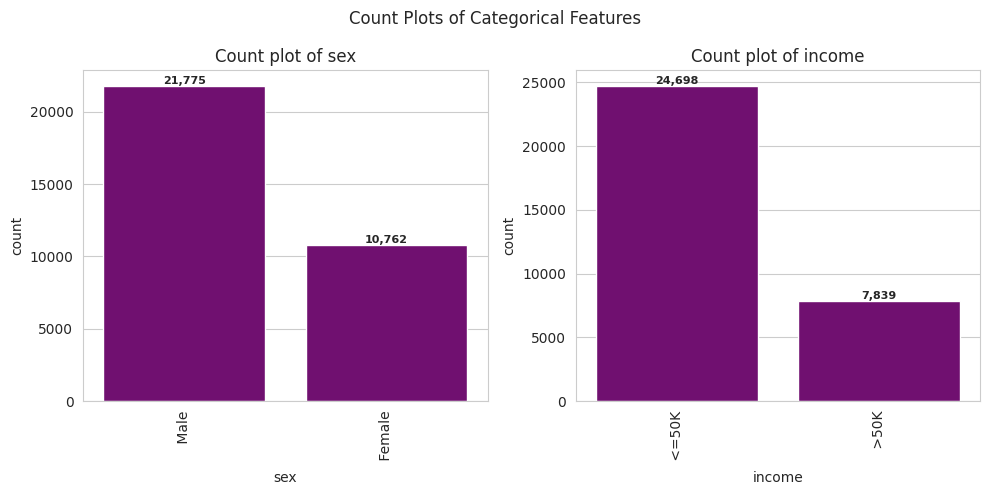

In [15]:
p = 1
n_rows = np.ceil(len(one_hot_cols)/2).astype(int)
n_cols = 2
sns.set_style('whitegrid')
plt.figure(figsize=(n_cols*5, n_rows*5))
plt.suptitle('Count Plots of Categorical Features')
for col in one_hot_cols.index:
    plt.subplot(n_rows, n_cols, p)
    baar = sns.countplot(data = df, x = col, color = 'purple')
    for container in baar.containers:
      baar.bar_label(container, fontsize = 8, fontweight = 'bold', fmt='{:,.0f}')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    p+=1
plt.show()

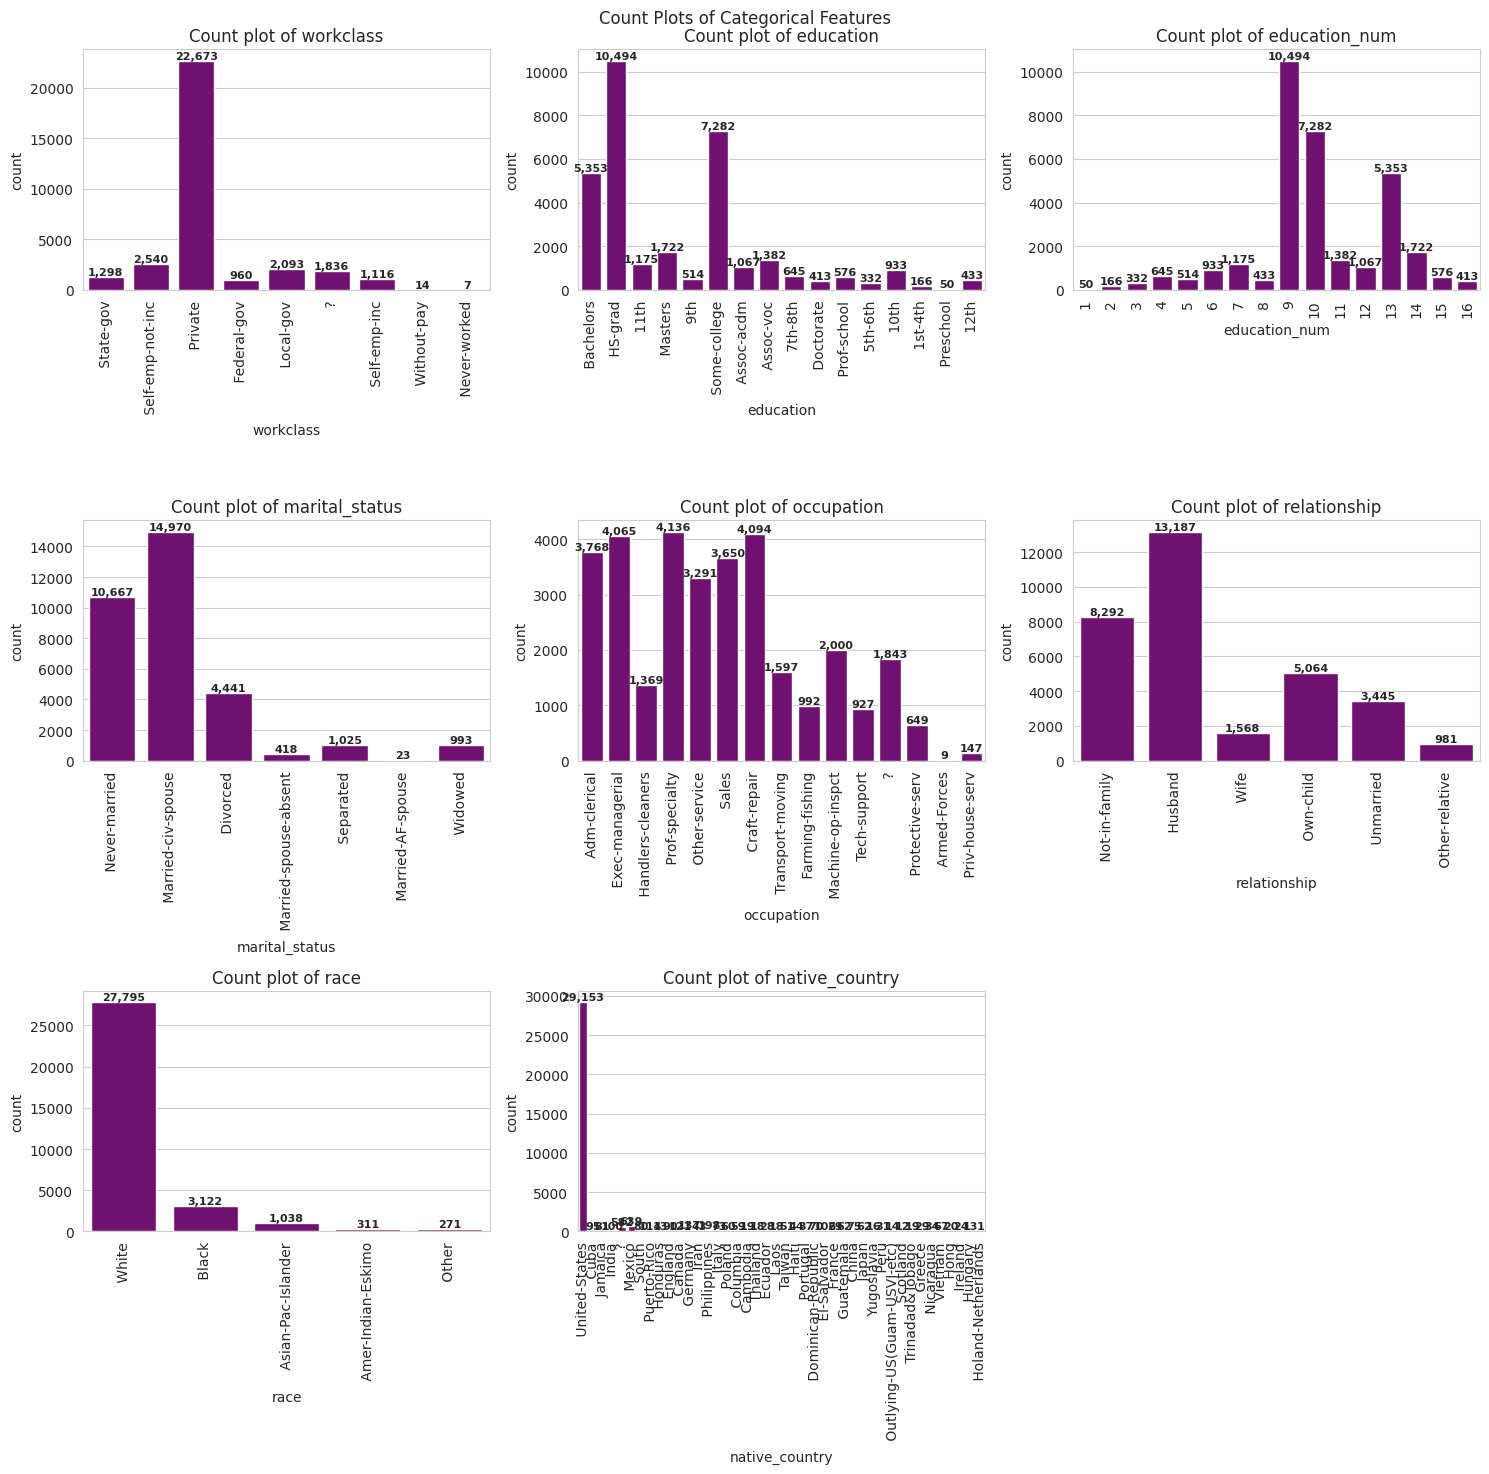

In [16]:
p = 1
n_rows = np.ceil(len(le_cols)/3).astype(int)
n_cols = 3
sns.set_style('whitegrid')
plt.figure(figsize=(n_cols*5, n_rows*5))
plt.suptitle('Count Plots of Categorical Features')
for col in le_cols.index:
    plt.subplot(n_rows, n_cols, p)
    baar = sns.countplot(data = df, x = col, color = 'purple')
    for container in baar.containers:
      baar.bar_label(container, fontsize = 8, fontweight = 'bold', fmt='{:,.0f}')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    p+=1
plt.show()

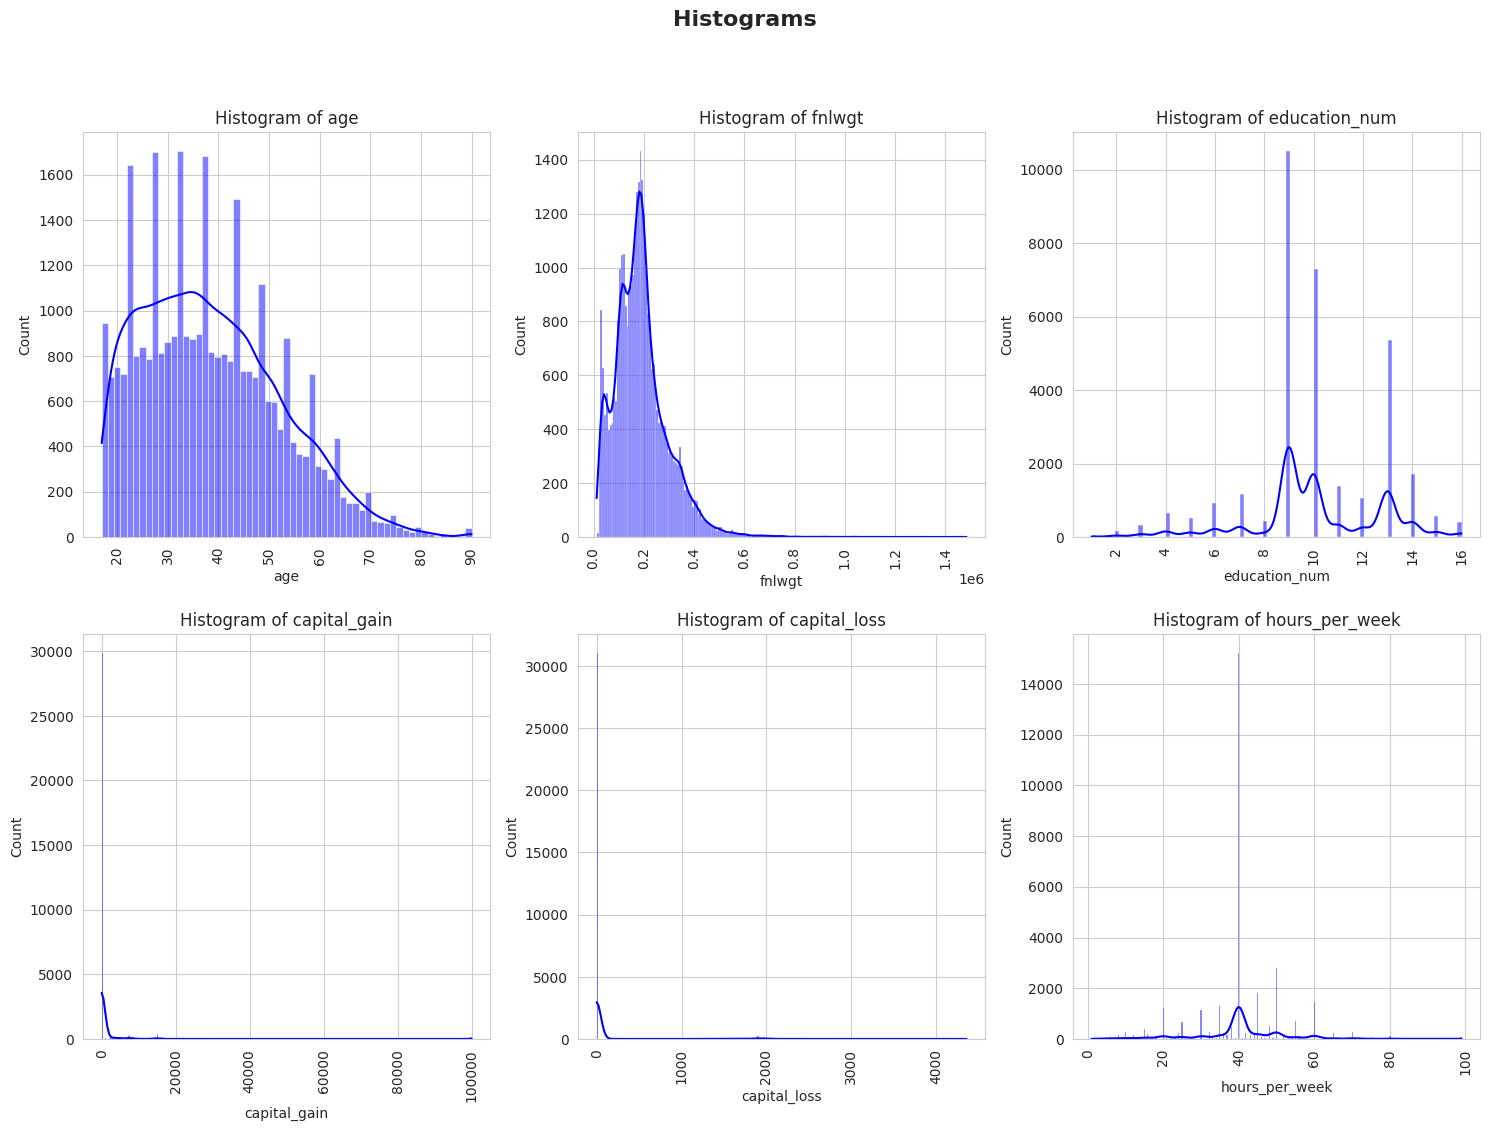

In [17]:
p = 1
n_rows = np.ceil(len(df.columns)/3).astype(int)
n_cols = 3
sns.set_style('whitegrid')
plt.figure(figsize=(n_cols*5, n_rows*5))
plt.suptitle('Histograms', fontweight = 'bold', fontsize = 16, y=1.02)
for col in df.select_dtypes(include = 'int').columns:
    plt.subplot(n_rows, n_cols, p)
    sns.histplot(data = df, x = col, kde = True, color = 'blue')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    p+=1
plt.show()

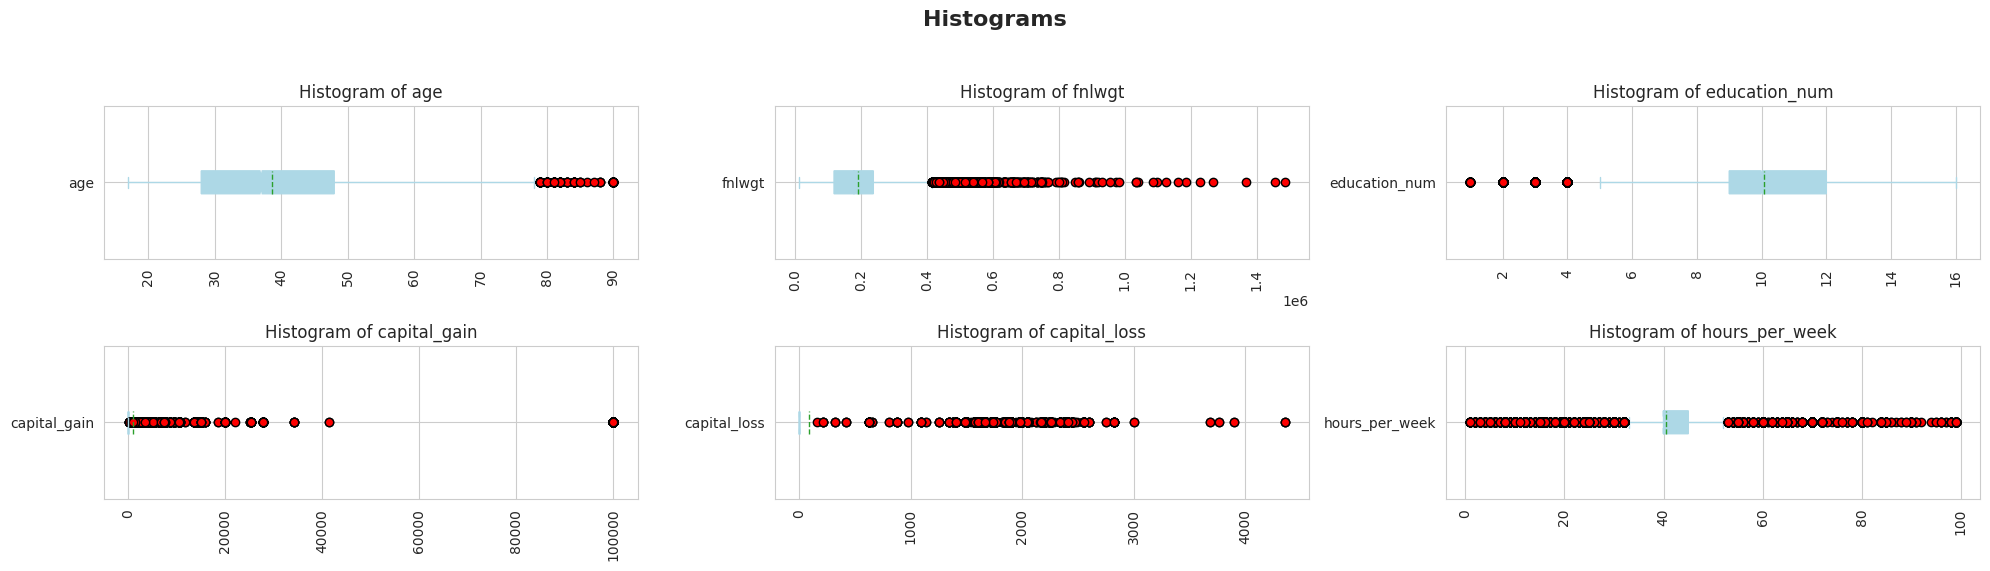

In [18]:
p = 1
n_rows = np.ceil(len(df.columns)/3).astype(int)
n_cols = 3
sns.set_style('whitegrid')
plt.figure(figsize=(20, 12))
plt.suptitle('Histograms', fontweight = 'bold', fontsize = 16, y=1.02)
for col in df.select_dtypes(include = 'int').columns:
    plt.subplot(n_rows, n_cols, p)
    df[col].plot(kind = 'box', vert = False, color = 'lightblue',patch_artist = True,
                 showmeans = True, meanline = True, notch = True, grid = True,
                 flierprops = dict(marker = 'o', markerfacecolor = 'red'))
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    p+=1
plt.show()

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Preprocessing

## Removing outliers

In [20]:
df1 = df.copy()

In [21]:
from sklearn.ensemble import IsolationForest


In [22]:
iso = IsolationForest(contamination= 0.01)
outliers = iso.fit_predict(df1.select_dtypes(include = 'number'))
df1 = df1[outliers == 1]

In [23]:
df1.shape

(32211, 15)

Outliers can significantly distort model performance by skewing parameter estimates, especially in models like linear regression that rely on minimizing error. They can lead to overfitting, where the model learns noise instead of meaningful patterns, reducing generalizability to new data. In classification tasks, outliers may cause misclassification or shift decision boundaries unfavorably. Additionally, they can inflate metrics like variance and standard error, making model evaluation unreliable. Handling outliers—whether by transformation, removal, or robust modeling—is crucial for building stable and accurate predictive systems.

## Feature Engineering

In [24]:
#Segregating the age into groups
df1['age_group'] = pd.cut(df1['age'], bins = [0,18,35,60,75,100], labels = ['Child','Young', 'Adult','Elder','Old']).astype(str)

In [25]:
#Capita Net
df1['capital_net'] = df1['capital_gain'] - df1['capital_loss']

In [26]:
#Log Transformation on fnlwtg
df1['fnlwgt_log'] = np.log(df1['fnlwgt'])

Age Group helps capture life-stage patterns.

Capital Net combines gain/loss into a single economic indicator.

Log transformation reduces skewness in fnlwgt, improving model stability.

## Encoding

### One Hot Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df2 = df1.copy()

In [29]:
one_hot_cols

,0
sex,2
income,2


In [30]:
df2 = pd.get_dummies(df2, columns = one_hot_cols.index, drop_first = False, dtype = 'int64')

In [31]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,age_group,capital_net,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,Adult,2174,11.258240,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,Adult,0,11.330336,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,Adult,0,12.281393,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,Adult,0,12.366153,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,Young,0,12.732011,1,0,1,0


### Label Encoder

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
cat_cols = df2.select_dtypes(include = 'object')
cat_cols = cat_cols.nunique()[cat_cols.nunique()>=5]
cat_cols

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
native_country,42
age_group,5


In [34]:
le = LabelEncoder()
for col in cat_cols.index:
  df2[col] = le.fit_transform(df2[col])

In [35]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,age_group,capital_net,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,2174,11.258240,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,11.330336,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,12.281393,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,12.366153,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,4,0,12.732011,1,0,1,0


In [36]:
df2.drop(['fnlwgt','education_num','capital_gain', 'capital_loss','age'], axis = 1, inplace = True)

**Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

One-Hot Encoding:

Pros:

Ideal for nominal data (e.g., colors, countries) where categories have no inherent order. Works well with algorithms that dont assume relationships between categories, like logistic regression, neural networks, and KNN.Each binary column represents a specific category, making it easy to understand.

Cons:

Creates a new column for each category, which can lead to high dimensionality and sparse matrices when applied to features with many unique values, which may slow down training and increase memory usage.


Label Encoding:

Pros:

Converts categories into integers, keeping the feature space small. Faster and less memory-intensive than one-hot encoding. Works well with decision trees and random forests, which can handle ordinal relationships.

Cons:

Imposes an artificial order (e.g., 0 < 1 < 2), which can mislead models that assume numerical relationships which makes it harder to interpret since numbers dont reflect actual meaning. Algorithms like linear regression or SVM may treat encoded values as continuous, leading to incorrect assumptions.


## Scaling the Data

In [37]:
df3 = df2.copy()

In [38]:
df3.head()

,workclass,education,marital_status,occupation,relationship,race,hours_per_week,native_country,age_group,capital_net,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,7,9,4,1,1,4,40,39,0,2174,11.258240,0,1,1,0
1,6,9,2,4,0,4,13,39,0,0,11.330336,0,1,1,0
2,4,11,0,6,1,4,40,39,0,0,12.281393,0,1,1,0
3,4,1,2,6,0,2,40,39,0,0,12.366153,0,1,1,0
4,4,9,2,10,5,2,40,5,4,0,12.732011,1,0,1,0


In [82]:
scale_cols = ['hours_per_week', 'capital_net']

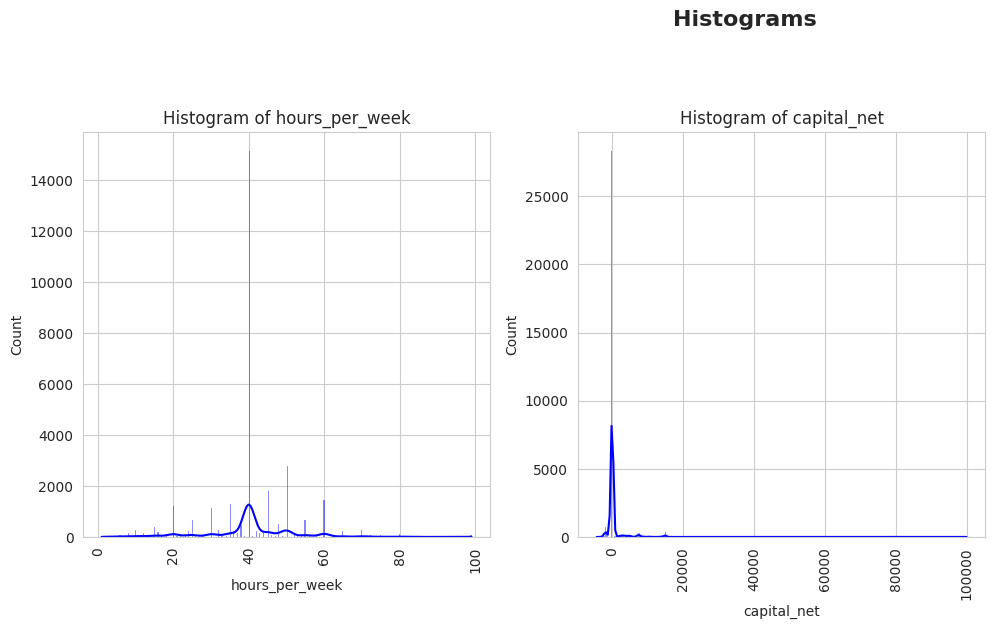

In [83]:
p = 1
n_rows = np.ceil(len(df3.columns)/3).astype(int)
n_cols = 3
sns.set_style('whitegrid')
plt.figure(figsize=(n_cols*5, n_rows*5))
plt.suptitle('Histograms', fontweight = 'bold', fontsize = 16, y=1.02)
for col in scale_cols:
    plt.subplot(n_rows, n_cols, p)
    sns.histplot(data = df3, x = col, kde = True, color = 'blue')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    p+=1
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [91]:
df3[scale_cols].skew()

,0
hours_per_week,0.202372
capital_net,12.156159


In [95]:
min_max_cols = df3[scale_cols].skew()[df3[scale_cols].skew()>1.5 ]


In [96]:
min_max_cols.index

Index(['capital_net'], dtype='object')

In [101]:
std_cols = df3[scale_cols].skew()[df3[scale_cols].skew()<1.5 ]

In [106]:
std_cols.index

Index(['hours_per_week'], dtype='object')

In [107]:
df_scaled = df3.copy()

### Min Max Scaling

In [108]:
df_scaled[min_max_cols.index] = min_max_scaler.fit_transform(df_scaled[min_max_cols.index])

In [47]:
df_scaled.head()

,workclass,education,marital_status,occupation,relationship,race,hours_per_week,native_country,age_group,capital_net,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,7,9,4,1,1,1.0,40,0.951220,0,0.062575,11.258240,0,1,1.0,0.0
1,6,9,2,4,0,1.0,13,0.951220,0,0.041742,11.330336,0,1,1.0,0.0
2,4,11,0,6,1,1.0,40,0.951220,0,0.041742,12.281393,0,1,1.0,0.0
3,4,1,2,6,0,0.5,40,0.951220,0,0.041742,12.366153,0,1,1.0,0.0
4,4,9,2,10,5,0.5,40,0.121951,4,0.041742,12.732011,1,0,1.0,0.0


Min Max scaling is used for data that is not normally distributed and when we need to preserve the original distribution and scale features to a fixed range (typically 0 to 1). MinMaxScaler compresses all values into a uniform range, ensuring that no feature dominates due to scale differences—especially important for distance-based or activation-sensitive models.

### Standard Scaling

In [109]:
df_scaled[std_cols.index] = scaler.fit_transform(df_scaled[std_cols.index])

In [110]:
df_scaled.head()

,workclass,education,marital_status,occupation,relationship,race,hours_per_week,native_country,age_group,capital_net,fnlwgt_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,7,9,4,1,1,4,-0.030311,39,0,0.062575,11.258240,0,1,1,0
1,6,9,2,4,0,4,-2.243525,39,0,0.041742,11.330336,0,1,1,0
2,4,11,0,6,1,4,-0.030311,39,0,0.041742,12.281393,0,1,1,0
3,4,1,2,6,0,2,-0.030311,39,0,0.041742,12.366153,0,1,1,0
4,4,9,2,10,5,2,-0.030311,5,4,0.041742,12.732011,1,0,1,0


Standard Scaling is used for normally distributed data or approximately Gaussian. StandardScaler transforms features to have mean = 0 and standard deviation = 1, which helps gradient-based models converge faster and interpret coefficients more meaningfully.

# PPS Score Analysis


In [50]:
import ppscore as pps


In [111]:
pps_matrix = pps.matrix(df_scaled)

In [112]:
pps_matrix[pps_matrix['case'] != 'predict_itself'].sort_values(by='ppscore', ascending=False).head(20)


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
209,income_ <=50K,income_ >50K,1.000000,regression,True,mean absolute error,0.2420,0.000000,DecisionTreeRegressor()
191,sex_ Male,sex_ Female,1.000000,regression,True,mean absolute error,0.3344,0.000000,DecisionTreeRegressor()
177,sex_ Female,sex_ Male,1.000000,regression,True,mean absolute error,0.3344,0.000000,DecisionTreeRegressor()
223,income_ >50K,income_ <=50K,1.000000,regression,True,mean absolute error,0.2420,0.000000,DecisionTreeRegressor()
62,relationship,marital_status,0.317633,regression,True,mean absolute error,1.1508,0.785268,DecisionTreeRegressor()
71,relationship,sex_ Female,0.241145,regression,True,mean absolute error,0.3344,0.253761,DecisionTreeRegressor()
72,relationship,sex_ Male,0.241145,regression,True,mean absolute error,0.3344,0.253761,DecisionTreeRegressor()
45,occupation,workclass,0.187879,regression,True,mean absolute error,0.7770,0.631018,DecisionTreeRegressor()
34,marital_status,relationship,0.152785,regression,True,mean absolute error,1.2682,1.074439,DecisionTreeRegressor()
169,sex_ Female,relationship,0.136697,regression,True,mean absolute error,1.2682,1.094840,DecisionTreeRegressor()


## Correlation Matrix

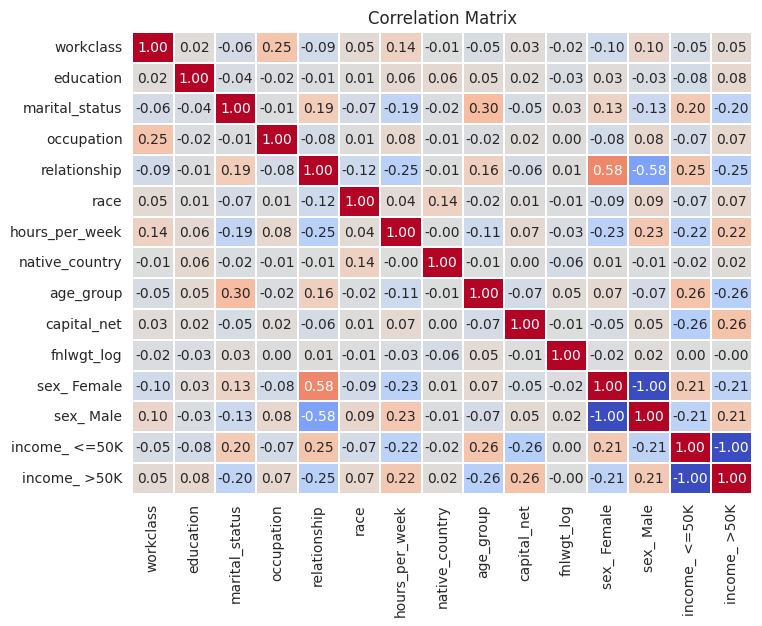

In [114]:
plt.figure(figsize = (8,6))
sns.heatmap(df_scaled.corr(), annot = True, fmt = '.2f', cbar = False,
             cmap = 'coolwarm', linewidths = 0.025)
plt.title('Correlation Matrix')
plt.show()

As the income and sex were encoded they get the highest pps score. Relationship appears to be a strong predictor for marital_status and sex_Male (and likely sex_Female). The PPS scores are 0.31 & 0.24, respectively, indicating a notable predictive relationship. This makes intuitive sense, as one's relationship status is often closely tied to their marital status and gender.

Most of the remaining relationships have very low PPS scores. The PPS between workclass and age_group is 0.014524, indicating that a person's work class is a poor predictor of their age group.
The score for income_<=50K predicting age_group is extremely low (0.046361), which suggests that knowing someone's income bracket is not very helpful for predicting their age.

The correlation matrix highlights that linear relationships between most pairs of variables in this dataset are weak. The only strong correlations are between variables that are fundamentally opposites (like sex_Male vs. sex_Female and income_<=50K vs. income_>50K). This suggests that linear models alone may not capture the full complexity of the relationships within this dataset.